C:\Users\VIVEK KUMAR SINGH\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 1.202800531291985


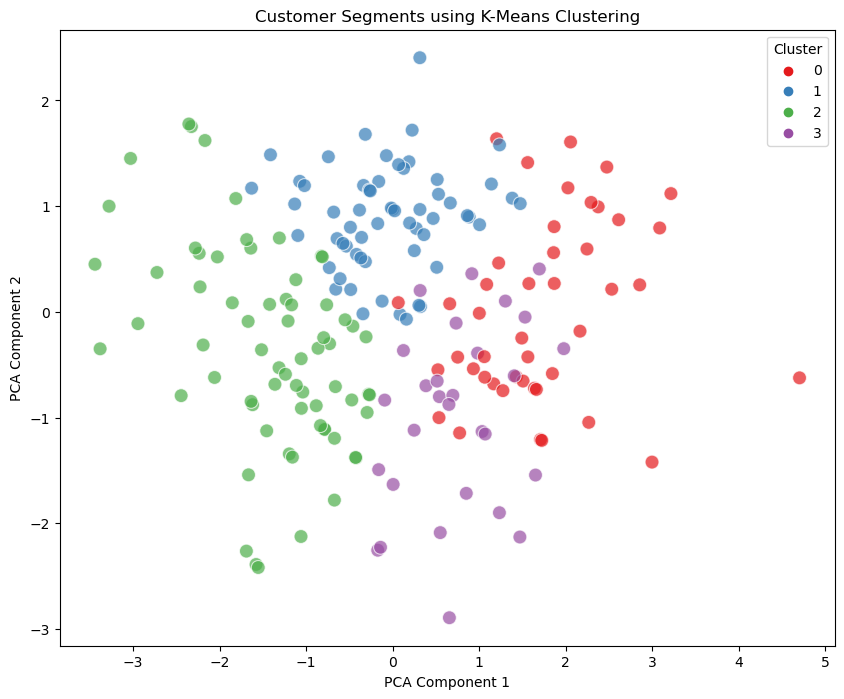

Cluster
2    67
1    59
0    44
3    29
Name: count, dtype: int64
Silhouette Score: 0.26016176087678383


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv(r"C:\Users\VIVEK KUMAR SINGH\Downloads\Customers.csv")
transactions = pd.read_csv(r'C:\Users\VIVEK KUMAR SINGH\Downloads\Transactions.csv')

# Merge the datasets to get transaction details with customer data
merged_data = transactions.merge(customers, on='CustomerID')

# Feature Engineering: Aggregate transaction data at the customer level
customer_data = merged_data.groupby('CustomerID').agg(
    total_transactions=('TransactionID', 'count'),
    total_spend=('TotalValue', 'sum'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

# Merge customer data with their demographic information
customer_data = customer_data.merge(customers[['CustomerID', 'Region']], on='CustomerID')

# Convert categorical features (Region) into numerical format
customer_data['Region'] = customer_data['Region'].astype('category').cat.codes

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['total_spend', 'total_transactions', 'avg_transaction_value', 'Region']])

# Perform K-Means clustering with a specified number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)  # You can try 2 to 10 clusters
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Calculate the Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(scaled_data, customer_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Visualize the clusters using PCA (2D visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Add PCA components to the dataframe for visualization
customer_data['PCA_1'] = pca_components[:, 0]
customer_data['PCA_2'] = pca_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customer_data, x='PCA_1', y='PCA_2', hue='Cluster', palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segments using K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Display the number of customers in each cluster
cluster_counts = customer_data['Cluster'].value_counts()
print(cluster_counts)

# Additional metrics (Optional)
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, customer_data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')
